In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [3]:
import os

df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')

X = []
y = []
for file in os.listdir('preprocessed'):
    df = pd.read_csv(os.path.join('preprocessed', file))
    if df.shape[0] != 50:
        continue
    X.append(df[['pos', 'neg', 'neu']].to_numpy().reshape(150))
    y.append(df_labels[df_labels['sid'] == file.split('.')[0]]['has_depression'].item())

In [4]:
len(X), len(y)

(2963, 2963)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MLP Classifier

In [5]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', random_state=42)

model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [6]:
model.score(X_test, y_test)

0.7403035413153457

### SVM

In [7]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [8]:
model.score(X_test, y_test)

0.8043844856661045

### Classifier comparison

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}: {round(score, 5)}')

Nearest Neighbors: 0.76391
Linear SVM: 0.80438
RBF SVM: 0.80438
Gaussian Process: 0.80438
Decision Tree: 0.76391
Random Forest: 0.80438
Neural Net: 0.74874
AdaBoost: 0.77572
Naive Bayes: 0.49916
QDA: 0.67622


---
## Multi-class classification

In [17]:
import os

df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')

classes = {'None-Minimal': 0, 'Mild': 1, 'Moderate': 2, 'Moderately Severe': 3, 'Severe': 4}
X = []
y = []
for file in os.listdir('preprocessed'):
    df = pd.read_csv(os.path.join('preprocessed', file))
    if df.shape[0] != 50:
        continue
    X.append(df[['pos', 'neg', 'neu']].to_numpy().reshape(150))
    y.append(classes[df_labels[df_labels['sid'] == file.split('.')[0]]['depression_severity'].item()])

In [20]:
len(X), len(y)

(2963, 2963)

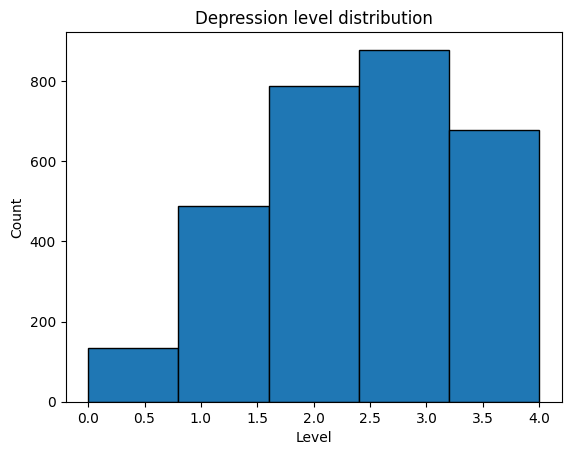

In [42]:
import matplotlib.pyplot as plt

plt.hist(y, bins=5, ec='black')
plt.title('Depression level distribution')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}: {round(score, 5)}')

Nearest Neighbors: 0.26813
Linear SVM: 0.2968
RBF SVM: 0.32546


/Users/alinka/Documents/innovaid/eye-tracking-for-depression/venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/alinka/Documents/innovaid/eye-tracking-for-depression/venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process: 0.32546
Decision Tree: 0.29174
Random Forest: 0.27825
Neural Net: 0.26476
AdaBoost: 0.26138
Naive Bayes: 0.15346
QDA: 0.18381


/Users/alinka/Documents/innovaid/eye-tracking-for-depression/venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [49]:
import torch
from torch import nn


rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)
output, hn

(tensor([[[-0.0044, -0.4755, -0.1381,  0.6692,  0.8015, -0.5216, -0.5255,
            0.0573,  0.7619, -0.5251, -0.6885,  0.5429,  0.7549, -0.2148,
           -0.1070, -0.1893, -0.8386, -0.2096, -0.2145,  0.4062],
          [ 0.0709,  0.3315, -0.2326,  0.8395, -0.4771,  0.9500, -0.6196,
            0.7909,  0.3634, -0.8260, -0.2877,  0.5237,  0.0866, -0.4192,
            0.0249,  0.2445, -0.8433,  0.7093, -0.8770, -0.3614],
          [ 0.2235, -0.6254,  0.4209,  0.0544, -0.3799, -0.8976,  0.0188,
           -0.4997,  0.7668, -0.4054, -0.3341,  0.0500,  0.0915,  0.1440,
            0.1671,  0.4434, -0.0647, -0.0039,  0.2768, -0.1064]],
 
         [[-0.5715,  0.0076,  0.4712,  0.4865, -0.3794, -0.2422, -0.1806,
           -0.2583,  0.4600, -0.3682,  0.1404, -0.0879, -0.4204,  0.1224,
           -0.2347,  0.1103,  0.0719, -0.6124,  0.5634, -0.3281],
          [-0.5300,  0.6590,  0.4560,  0.6348, -0.4435, -0.0374, -0.4449,
           -0.5498,  0.7924, -0.0153,  0.1367, -0.2182,  0.5373,  0